In [1]:
# Import Dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import tweepy
import time
from datetime import datetime
from tweepy_config import consumer_key, consumer_secret, access_token, access_token_secret

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

plt.style.use('ggplot')


In [2]:
# Set up Tweepy credentials

# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

# Set up Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Create list of twitter usernames desired for search
news_usernames = ["@BBC","@CBS","@CNN","@FoxNews","@nytimes"]

# Create a list to store individual tweet's compound sentiment
ind_sentiment_list = []

# Create list to hold the final total average of all tweets in the twitter pulls
avg_sentiment_list = []

# Loop through each news agency
for news in news_usernames:

    # Create a set of lists to hold each of the sentiment values
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Paginate through five pages to collect 100 tweets per specified user
    for x in range(1,6):

        # Collect tweets from the specified page for the specified user
        public_tweets = api.user_timeline(news, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

                # Perform VADER analysis and store in variable
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]

                # Add each value to the compound list so that it can be averaged
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                
                # Also create a dictionary for each individual tweet
                temp_ind_dict = {"User": news,\
                                "Compound":compound,\
                                "Positive":pos,\
                                "Neutral":neu,\
                                "Negative":neg,\
                                "Text":tweet["text"],\
                                "Date Created":tweet["created_at"]\
                                }
                
                # Append the individual sentiment list to contain the tweet's information
                ind_sentiment_list.append(temp_ind_dict)
        
        # Use time.sleep to prevent abusing API call
        time.sleep(1)

    # Once all tweets have been gathered for a user, average values gathered on all tweets and add to a dictionary
    sentiment = {
        "User": news,
        "Compound": np.mean(compound_list),
        "Positive": np.mean(positive_list),
        "Neutral": np.mean(negative_list),
        "Negative": np.mean(neutral_list),
        "Tweet Count": len(compound_list)
    }
    
    # Append the average sentiment data to the average sentiment list
    avg_sentiment_list.append(sentiment)
    
    # Print confirmation message for each user
    print(f"Twitter user {news} has been completed")

Twitter user @BBC has been completed
Twitter user @CBS has been completed
Twitter user @CNN has been completed
Twitter user @FoxNews has been completed
Twitter user @nytimes has been completed


In [8]:
# Create pandas DataFrame containing the sentiment analysis of each individual tweet

news_tweet = pd.DataFrame(ind_sentiment_list)

# Reorganize the columns

news_tweet = news_tweet[["User","Compound","Positive","Neutral","Negative","Text","Date Created"]]

# Save the DataFrame as a CSV

news_tweet.to_csv("Output/NewsTweetAnalysis.csv")

# Display a preview of the DataFrame

news_tweet.head()


User  Compound  Positive  Neutral  Negative  \
0  @BBC    0.0000     0.000    1.000     0.000   
1  @BBC    0.3612     0.115    0.830     0.055   
2  @BBC   -0.5719     0.084    0.696     0.220   
3  @BBC    0.0000     0.000    1.000     0.000   
4  @BBC    0.0000     0.000    1.000     0.000   

                                                Text  \
0  Running away from your responsibilities on a F...   
1  RT @BBCRadio4: 🥁 'Why I'm banging the drum for...   
2  RT @BBCLookNorth: Staff @SheffChildrens pulled...   
3  ❤️🦏 A critically endangered Eastern Black Rhin...   
4  🗣️🚆 Commuters in Toronto are getting travel ti...   

                     Date Created  
0  Fri Aug 03 15:59:00 +0000 2018  
1  Fri Aug 03 14:03:46 +0000 2018  
2  Fri Aug 03 13:40:19 +0000 2018  
3  Fri Aug 03 13:20:18 +0000 2018  
4  Fri Aug 03 12:47:36 +0000 2018

In [9]:
# Create another pandas DataFrame containing the average sentiment analysis for each user

news_avg = pd.DataFrame(avg_sentiment_list)

# Reorganize the columns

news_avg = news_avg[["User","Compound","Positive","Neutral","Negative","Tweet Count"]]

# Save the DataFrame as a CSV

news_avg.to_csv("Output/NewsTweetAverage.csv")

# Display the DataFrame

news_avg


User  Compound  Positive  Neutral  Negative  Tweet Count
0      @BBC  0.095253   0.08761  0.05480   0.85758          100
1      @CBS  0.248885   0.14218  0.01983   0.83801          100
2      @CNN -0.073612   0.06954  0.09812   0.83231          100
3  @FoxNews -0.034373   0.06397  0.08622   0.84981          100
4  @nytimes -0.038709   0.05774  0.07485   0.86740          100

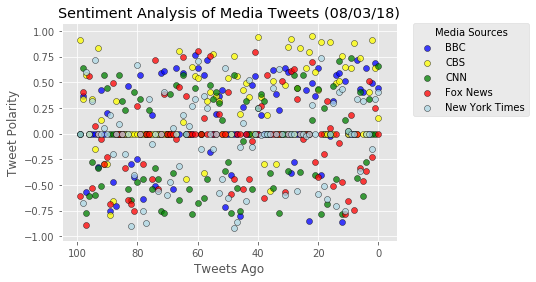

In [10]:
# Create a scatter plot to display the compound sentiment analysis of all tweets gathered

# Start by setting the x value for the graph, having the numeric list count down instead of up

x_value = np.arange(99,-1,-1)

# Extract each news agency's tweets from the DataFrame

bbc_temp = news_tweet.loc[news_tweet["User"] == "@BBC"]
cbs_temp = news_tweet.loc[news_tweet["User"] == "@CBS"]
cnn_temp = news_tweet.loc[news_tweet["User"] == "@CNN"]
fox_temp = news_tweet.loc[news_tweet["User"] == "@FoxNews"]
nyt_temp = news_tweet.loc[news_tweet["User"] == "@nytimes"]

bbc_y = bbc_temp["Compound"]
cbs_y = cbs_temp["Compound"]
cnn_y = cnn_temp["Compound"]
fox_y = fox_temp["Compound"]
nyt_y = nyt_temp["Compound"]

# Plot each news agency's tweets using the above values

plt.scatter(x_value, bbc_y, marker="o", facecolors="blue", edgecolors="black", alpha=0.75, label="BBC")
plt.scatter(x_value, cbs_y, marker="o", facecolors="yellow", edgecolors="black", alpha=0.75, label="CBS")
plt.scatter(x_value, cnn_y, marker="o", facecolors="green", edgecolors="black", alpha=0.75, label="CNN")
plt.scatter(x_value, fox_y, marker="o", facecolors="red", edgecolors="black", alpha=0.75, label="Fox News")
plt.scatter(x_value, nyt_y, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75, label="New York Times")

# Invert the x axis to display the data in the correct order

plt.gca().invert_xaxis()

# Get the current time so it can be added to the title

now = datetime.now()
now = now.strftime("%m/%d/%y")

# Set the titles and axis labels

plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

# Create a legend

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title="Media Sources")

# Save the figure

plt.savefig("Output/Ind_News_Sent.png")

# Display the graph

plt.show()


### Analysis of Individual Tweet Sentiments

From the above graph, one can see that the sentiment of tweets for each news source varies greatly, with most agencies featuring a mixture of positive and negative. It can be very readily noticed that CBS is distinctly more positive than any of the others, with a large cluster of tweets occupying the upper strata of the graph. This is perhaps the most obvious of the trends for each news agency.

The BBC likewise does have a good cluster of positive tweets, but this is balanced by severely negative tweets as well. Their span of polarity is greater than CBS, but they have a higher concentration of positive tweets than CNN does, which has a significant population of negative tweets grouped at the bottom, sharing this negative trend with Fox News and the New York Times.

The middle of the graph should also be addressed, in that a majority of the tweets from every news organization fall along the 0 line, probably because news agencies may tweet out short news articles that contain very few words which allow for polarity to be determined. Thus, these tweets feature a "Neutral" score of 1.000, rendering it a perfect 0.000 in its Compound value.

In [11]:
# Create a bar chart to display the average sentiment of each news agency collected

# Create a list containing each of the news agency's names

news_name = ["BBC","CBS","CNN","Fox News","NY Times"]

# Create x value for the bar chart

x_value = np.arange(len(news_name))

# Plot the values in a bar chart

plt.bar(x_value, news_avg["Compound"], color=['b','y','g','r','lightblue'], alpha=0.8, align='center')

# Set the x axis titles

ticks = [value for value in x_value]
plt.xticks(ticks, news_name)

# Set the chart title and y axis label

plt.title(f"Overall Media Sentiment Analysis on Twitter ({now})")
plt.ylabel("Tweet Polarity")

# Save the figure

plt.savefig("Output/Overall_News_Sent.png")

# Display the chart

plt.show()


### Analysis of Average Tweet Sentiment

From the above graph, it can be confirmed that CBS has been sending far more positive tweets than any of the other news organizations. They sit right at +0.25 Compound polarity, which is easily higher than the BBC, the next highest. The BBC and CBS are the only two news agencies which record a positive polarity score as well.

The other three agencies sit below zero, though only CNN goes below -0.05 polarity. Both Fox News and the NY Times have a slight negative trend, while CNN's negative trend is more pronounced. In the case of all three, examining the previous graph displaying individual tweets, there is no distinct trend of positive or negative, with both positive and negative tweets following each other in close succession. This is true for all of the news agencies, which shows that CBS simply tweets more positive tweets than the others, while CNN is more likely to send a negative tweet.

We can determine that news agencies do not tweet sequences of positive or negative tweets, it simply is a matter of what stories they run across. One could reasonably conclude that CBS prefers to cover more positive news stories than the other agencies, while CNN is more likely to cover negative stories.

Lastly, it should be noted that a fascinating trend exists in the CSV displaying the average sentiment values for all news agencies. Even though their compound scores ranged from -0.07 to +0.25, all five news agencies had around 0.85 in the Negative category of the VADER sentiment analysis. All the news agencies were exceptionally close to one another, with the distinguishing feature being the Positive and Neutral categories. CBS, for example, has a very small Neutral score of 0.02, and a positive score of 0.14. Thus, it can be seen that negative words appear frequently in the tweets of all news agencies, and the degree of separation comes from their usage of more positive words as a result. CBS can be assumed to employ more positive language than their other media counterparts.